<a href="https://colab.research.google.com/github/mightymiklas/DBMF_Time_Series_Predictions/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
from pathlib import Path
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [104]:
from google.colab import files
uploaded = files.upload()

Saving DBMF.csv to DBMF (1).csv


In [105]:
dbmf_df = pd.read_csv("DBMF.csv").dropna()

In [106]:
dbmf_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-08,25.040001,25.040001,25.004999,25.004999,20.551298,499400
1,2019-05-09,25.020000,25.020000,24.940001,25.018999,20.562805,600
2,2019-05-10,25.023001,25.023001,25.023001,25.023001,20.566093,100
3,2019-05-13,24.840000,24.840000,24.840000,24.840000,20.415689,100
4,2019-05-14,24.959999,25.000000,24.959999,24.982000,20.532396,200
...,...,...,...,...,...,...,...
848,2022-09-19,32.980000,33.289001,32.669998,32.990002,32.990002,445300
849,2022-09-20,33.119999,33.490002,33.119999,33.220001,33.220001,877900
850,2022-09-21,33.270000,33.660000,33.099998,33.400002,33.400002,1030100
851,2022-09-22,33.330002,33.610001,33.250999,33.470001,33.470001,996100


In [108]:
df = dbmf_df.filter(['Open',"High","Low","Close", "Adj Close", "Volume"])

In [118]:
#Scaling feautures 
scaler = MinMaxScaler(feature_range=(0,1))

##apply to DF
scaled_Data = scaler.fit_transform(df)

In [119]:
scaled_df = pd.DataFrame(data=scaled_Data, index=dbmf_df.Date, columns=['Open',"High","Low","Close", "Adj Close", "Volume"])

In [121]:
scaled_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-08,0.107327,0.102990,0.104687,0.100580,0.010102,0.301007
2019-05-09,0.105263,0.100977,0.097917,0.102005,0.010959,0.000362
2019-05-10,0.105573,0.101279,0.106563,0.102413,0.011204,0.000060
2019-05-13,0.086687,0.082855,0.087500,0.083783,0.000000,0.000060
2019-05-14,0.099071,0.098963,0.100000,0.098239,0.008694,0.000121
...,...,...,...,...,...,...
2022-09-19,0.926729,0.933454,0.903125,0.913469,0.936682,0.268399
2022-09-20,0.941176,0.953690,0.950000,0.936883,0.953815,0.529142
2022-09-21,0.956656,0.970804,0.947917,0.955207,0.967224,0.620879


In [123]:
stock_close_data = dbmf_df.filter(['Close'])

In [124]:
stock_close_dataset = stock_close_data.values

In [129]:
trainingDataLength = math.ceil( len(stock_close_dataset) * .8)

In [130]:
trainingDataLength

683

In [133]:
## Scaling the data its come under preprocessing stage
## Create feature range into 0,1
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaledData = scaler.fit_transform(stock_close_dataset)

## Display scaled data value
scaledData

array([[0.10058017],
       [0.1020054 ],
       [0.10241281],
       [0.08378296],
       [0.09823883],
       [0.13000112],
       [0.15769113],
       [0.16583528],
       [0.14903807],
       [0.15188853],
       [0.15351726],
       [0.13926499],
       [0.14466049],
       [0.16084699],
       [0.15036129],
       [0.155757  ],
       [0.13529482],
       [0.12623435],
       [0.13051003],
       [0.14028301],
       [0.13672004],
       [0.15667311],
       [0.14354067],
       [0.13824697],
       [0.14954698],
       [0.16491897],
       [0.17723699],
       [0.17642268],
       [0.19637575],
       [0.20574163],
       [0.20116054],
       [0.15860745],
       [0.16532638],
       [0.16939835],
       [0.14181004],
       [0.15453527],
       [0.1667516 ],
       [0.1774407 ],
       [0.20136425],
       [0.225593  ],
       [0.19922641],
       [0.1936273 ],
       [0.19067484],
       [0.18660287],
       [0.16461376],
       [0.17133269],
       [0.18507574],
       [0.184

In [134]:
## Create a new dataset which contain scaled value
StockTrainData = scaledData[0:trainingDataLength , :]

## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-60:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 61:
    print(Xtrain)
    print(Ytrain)
    print()

[array([0.10058017, 0.1020054 , 0.10241281, 0.08378296, 0.09823883,
       0.13000112, 0.15769113, 0.16583528, 0.14903807, 0.15188853,
       0.15351726, 0.13926499, 0.14466049, 0.16084699, 0.15036129,
       0.155757  , 0.13529482, 0.12623435, 0.13051003, 0.14028301,
       0.13672004, 0.15667311, 0.14354067, 0.13824697, 0.14954698,
       0.16491897, 0.17723699, 0.17642268, 0.19637575, 0.20574163,
       0.20116054, 0.15860745, 0.16532638, 0.16939835, 0.14181004,
       0.15453527, 0.1667516 , 0.1774407 , 0.20136425, 0.225593  ,
       0.19922641, 0.1936273 , 0.19067484, 0.18660287, 0.16461376,
       0.17133269, 0.18507574, 0.18405793, 0.19423791, 0.19423791,
       0.19260918, 0.19831009, 0.21470009, 0.23730021, 0.21368207,
       0.23251563, 0.22874885, 0.21184974, 0.22386236, 0.24524086])]
[0.22498208286674126]

[array([0.10058017, 0.1020054 , 0.10241281, 0.08378296, 0.09823883,
       0.13000112, 0.15769113, 0.16583528, 0.14903807, 0.15188853,
       0.15351726, 0.13926499, 0.14

In [135]:
## Convert Xtrain data, Ytrain data into numpy array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [136]:
## Reshape the Xtrain data (number of column and number of row)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(623, 60, 1)

In [137]:
## Develop LSTM model
model = Sequential()

## Assign neurons as 50
neurons = 50

## First LSTM layer
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(neurons, return_sequences= False)) 

## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1))

In [138]:
##Compile  model
## mse= mean squared error
model.compile(optimizer='adam', loss='mse') 

In [139]:
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2, validation_split=0.2)


Epoch 1/200
10/10 - 6s - loss: 0.0204 - val_loss: 0.0053 - 6s/epoch - 616ms/step
Epoch 2/200
10/10 - 1s - loss: 0.0055 - val_loss: 0.0049 - 664ms/epoch - 66ms/step
Epoch 3/200
10/10 - 1s - loss: 0.0030 - val_loss: 0.0040 - 654ms/epoch - 65ms/step
Epoch 4/200
10/10 - 1s - loss: 0.0023 - val_loss: 0.0038 - 628ms/epoch - 63ms/step
Epoch 5/200
10/10 - 1s - loss: 0.0020 - val_loss: 0.0038 - 690ms/epoch - 69ms/step
Epoch 6/200
10/10 - 1s - loss: 0.0020 - val_loss: 0.0043 - 667ms/epoch - 67ms/step
Epoch 7/200
10/10 - 1s - loss: 0.0019 - val_loss: 0.0035 - 633ms/epoch - 63ms/step
Epoch 8/200
10/10 - 1s - loss: 0.0019 - val_loss: 0.0038 - 657ms/epoch - 66ms/step
Epoch 9/200
10/10 - 1s - loss: 0.0018 - val_loss: 0.0033 - 665ms/epoch - 66ms/step
Epoch 10/200
10/10 - 1s - loss: 0.0018 - val_loss: 0.0040 - 625ms/epoch - 63ms/step
Epoch 11/200
10/10 - 1s - loss: 0.0017 - val_loss: 0.0032 - 636ms/epoch - 64ms/step
Epoch 12/200
10/10 - 1s - loss: 0.0018 - val_loss: 0.0032 - 653ms/epoch - 65ms/step
Epo

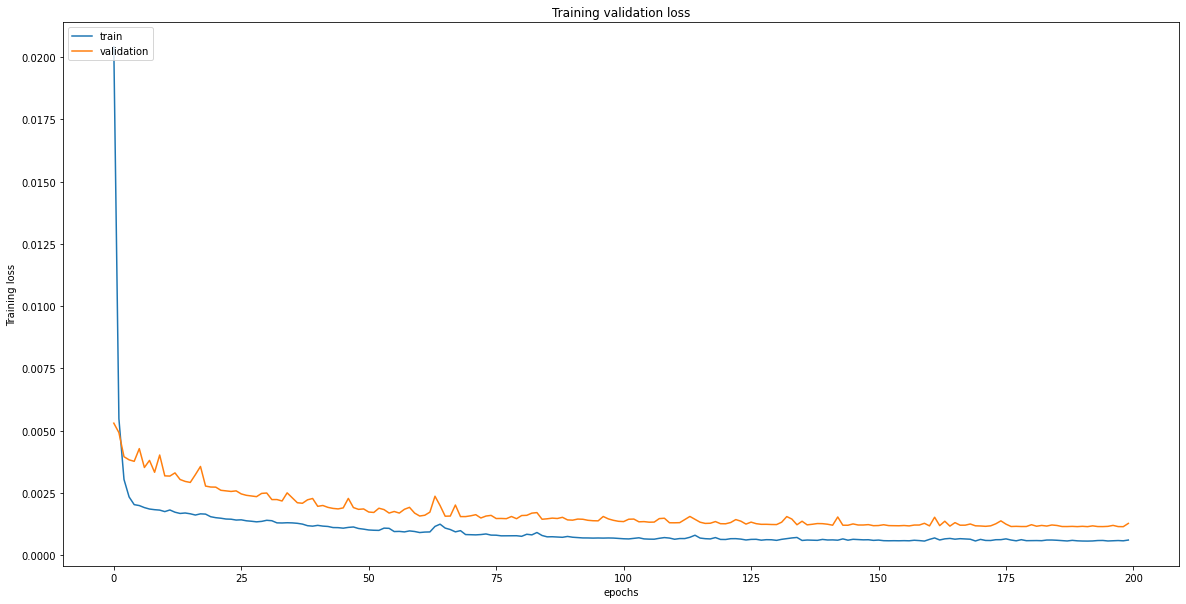

In [141]:
## Visualize train and validation loss
plt.figure(figsize=(20,10))
plt.title('Training validation loss')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'], loc = 'upper left')
plt.show()

In [142]:
##Create testing dataset, new array which contains scaled value from 2275 out of 2843
testingData = scaledData[trainingDataLength - 60: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
  Xtest.append(testingData[i-60:i, 0])
  

In [143]:
## Convert data into numpy array
Xtest = np.array(Xtest)
Xtest


array([[0.48732577, 0.47073206, 0.46961203, ..., 0.21205334, 0.20492731,
        0.21205334],
       [0.47073206, 0.46961203, 0.51440497, ..., 0.20492731, 0.21205334,
        0.1774407 ],
       [0.46961203, 0.51440497, 0.51898605, ..., 0.21205334, 0.1774407 ,
        0.16532638],
       ...,
       [0.83508103, 0.86460328, 0.87987377, ..., 0.90532424, 0.91346859,
        0.93688293],
       [0.86460328, 0.87987377, 0.85340548, ..., 0.91346859, 0.93688293,
        0.95520737],
       [0.87987377, 0.85340548, 0.82897282, ..., 0.93688293, 0.95520737,
        0.9623334 ]])

In [144]:
## Reshape data from 2 Dimensional to 3 Dimensional
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))


In [145]:
## Get predicted stock price value
## Unscaling the predicted value
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[26.003767],
       [25.718767],
       [25.560812],
       [25.756706],
       [25.951323],
       [25.97518 ],
       [26.126738],
       [25.86025 ],
       [25.803999],
       [25.840826],
       [25.88098 ],
       [26.129635],
       [25.926188],
       [25.791523],
       [25.958591],
       [26.056444],
       [26.549448],
       [26.691177],
       [26.302893],
       [26.204332],
       [25.991213],
       [25.99591 ],
       [26.182129],
       [26.356377],
       [26.710398],
       [26.706345],
       [26.582449],
       [27.066338],
       [27.359724],
       [27.285639],
       [27.097895],
       [27.903208],
       [28.280077],
       [27.578493],
       [27.784342],
       [28.017344],
       [27.884474],
       [27.58325 ],
       [27.251783],
       [27.507406],
       [27.549728],
       [28.375347],
       [29.014875],
       [29.17913 ],
       [28.688816],
       [29.107676],
       [28.93369 ],
       [28.77241 ],
       [28.677116],
       [28.372478],


In [146]:
## Get RSME(Root Mean Squared Error) it nearl to 5, then it will be best model
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

0.4433729300072217

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


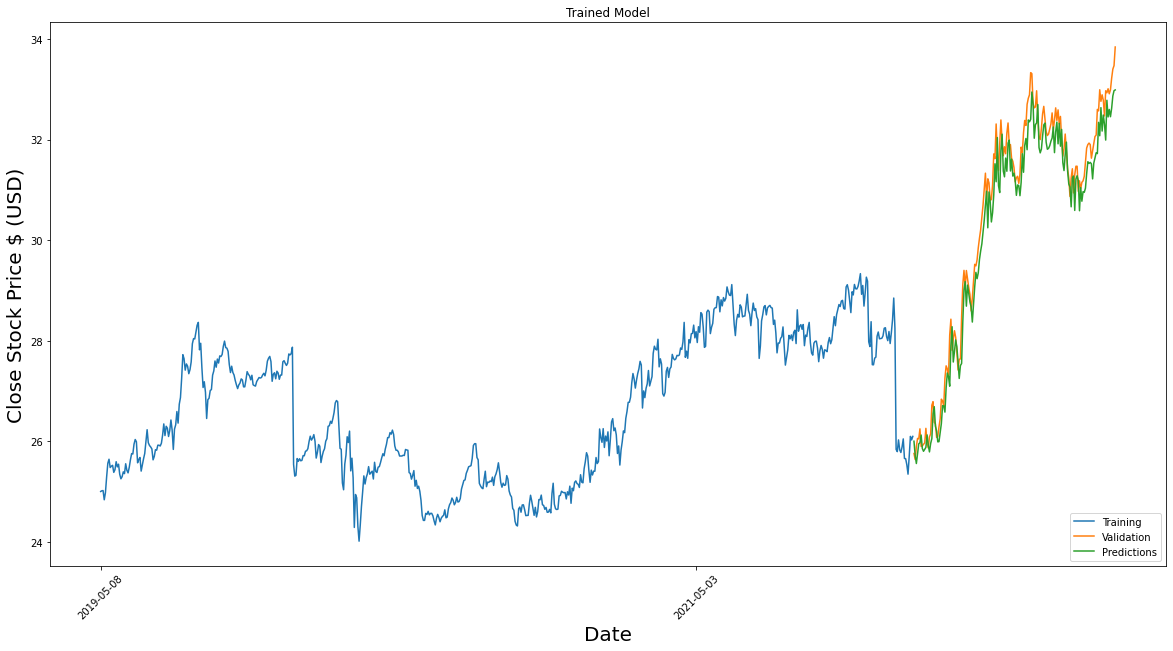

In [149]:
## Ploting data to graph train and validation
training = stock_close_data[:trainingDataLength]
validation = stock_close_data[trainingDataLength:]
validation['Predictions'] = predictions

## Visualize trainning, validating and predicting values in graph
plt.figure(figsize=(20,10))
plt.title('Trained Model')
plt.xticks(range(0,dbmf_df.shape[0],500),dbmf_df['Date'].loc[::500],rotation=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Stock Price $ (USD)', fontsize=20)
plt.plot(training['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [150]:
validation


,Close,Predictions
683,25.760000,26.003767
684,25.641001,25.718767
685,25.900000,25.560812
686,26.059999,25.756706
687,26.049999,25.951323
...,...,...
848,32.990002,32.454216
849,33.220001,32.622391
850,33.400002,32.866978
851,33.470001,32.971992


In [154]:

## Get quote of apple
appleQuote = web.DataReader('DBMF', data_source='yahoo', start='2020-01-01', end='2022-09-20')

## Creating a new dataframe
new_data_frame = appleQuote.filter(['Close'])

## Get the last sixty day closing stock price values and converting the dataframe into an array
last60Days = new_data_frame[-60:].values

##Scale the data to be values between 0 and 1
last60Days_scaled = scaler.transform(last60Days)

##Creating an empty test list
X_test_data = []

##Append the past 60 days
X_test_data.append(last60Days_scaled)

##Converting the X_test_data into a numpy array
X_test_data = np.array(X_test_data)

## Reshape data from 2 Dimensionsal to 3 Dimensional
X_test_data = np.reshape(X_test_data, (X_test_data.shape[0], X_test_data.shape[1], 1))

## Get predicted scaled stock price
predicted_price = model.predict(X_test_data)

## Unscaling the predicted value
predicted_price = scaler.inverse_transform(predicted_price)

## Display the pridicted price for next day
print(predicted_price)

RemoteDataError: ignored